In [1]:
import numpy as np
import pandas as pd
from Grid_copy import Grid
from binance.client import Client

In [2]:
symbol = "BTCUSDT"
coin = "BTC"
timeFrame = "4h"
startDate = "2019-07-22"
endDate = "2022-07-22"
client = Client()

In [3]:
bars = client.get_historical_klines(symbol=f'{coin}USDT',interval=timeFrame,start_str=startDate, end_str = endDate)
test_df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
test_df["date"]=pd.to_datetime(test_df["timestamp"],unit="ms").astype(str)
test_df = test_df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
test_df["open"] = pd.to_numeric(test_df["open"])
test_df["high"] = pd.to_numeric(test_df["high"])
test_df["low"] = pd.to_numeric(test_df["low"])
test_df["close"] = pd.to_numeric(test_df["close"])
test_df["volume"] = pd.to_numeric(test_df["volume"])

In [4]:
parameters = {
    "name":"grid",                                    ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "buy_unit" : 0.0001,                              ## float
    "grid_number" : 50,                               ## int  
    "equal_Diff_or_Ratio" : "DIFF",                   ## "DIFF", "RATIO"
    "trading_logistic":"long",                        ## "long", "short", "both"
    "initial_setup":{"type":"long", "protion":0.5},   ## "type": "long", "short" | "None". "portion" : float
    "lowest_price" : 3000.0,                          ## float
    "highest_price" : 20000.0                         ## float
}

myGrid = Grid(parameters)

In [5]:
myGrid.back_test(test_df.iloc[:100])

buy
buy
buy
buy
sell
sell
sell
sell
buy
buy


(-0.0005325460000000248, 10)

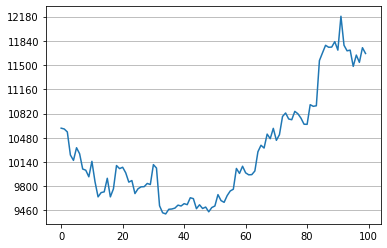

In [6]:
from matplotlib import pyplot as plt

# plt.plot(test_df["close"][:1000])
fig, ax = plt.subplots()
ax.set_yticks(myGrid.grid, minor=False)
ax.plot(test_df["close"][:100])
# ax.set_yticks([0.3, 0.55, 0.7], minor=True)
ax.yaxis.grid(True, which='major')
# ax.yaxis.grid(True, which='minor')